# Premier League 2022/23 Goal Analysis

The Premier League 2022/23 goal analysis is a mini project where I showcase my data analysis skills.  <br>This is my first data analysis project so I didn't go in depth because I haven't mastered this skill yet. (this will definitely change in the next few weeks)

In [1]:
import pandas as pd

The dataset contains 20 premier league teams and all the matches that they played.  <br>There are several attributes such as Full Time Home Goals and Full Time Away Goals written as FTHG and FTAG respectively, those of which I'm going to focus on.<br>I'm also going to focus on only the big 6 clubs, Man City, Arsenal, Man United, Liverpool, Tottenham and Chelsea.<br>
I'm a Man United fan myself so I will try by all means not to be biased:)

In [2]:
epl = pd.read_csv('data/epl_results_2022-23.csv')

In [3]:
epl.head()

Date   Time        HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  HTAG  \
0  05/08/2022  20:00  Crystal Palace      Arsenal     0     2   A     0     1   
1  06/08/2022  12:30          Fulham    Liverpool     2     2   D     1     0   
2  06/08/2022  15:00     Bournemouth  Aston Villa     2     0   H     1     0   
3  06/08/2022  15:00           Leeds       Wolves     2     1   H     1     1   
4  06/08/2022  15:00       Newcastle   Nottingham     2     0   H     0     0   

  HTR  ... HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  
0   A  ...   2    2  16  11   3   5   1   2   0   0  
1   H  ...   3    4   7   9   4   4   2   0   0   0  
2   H  ...   3    2  18  16   5   5   3   3   0   0  
3   D  ...   4    6  13   9   6   4   2   0   0   0  
4   D  ...  10    0   9  14  11   1   0   3   0   0  

[5 rows x 23 columns]

In [4]:
epl.columns

Index(['Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')

The first data wrangling process I'm taking is selecting the columns that I want.

In [5]:
epl = epl[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]

Some people will start by cleaning their data and putting it into appropriate form but for this project I saw as it's fit to first select the columns to be used then clean these columns afterwards. <br>


In [6]:
epl.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG'], dtype='object')

In [7]:
epl.dtypes

Date        object
HomeTeam    object
AwayTeam    object
FTHG         int64
FTAG         int64
dtype: object

The Date column is of object datatype.<br>
We need to change this to the datetime object and set Date as the index<br>
This will make selection and filtering easier by using the index which will be the Date

In [8]:
epl = epl.assign(
    Date=lambda x: pd.to_datetime(x.Date, infer_datetime_format=True)
)

C:\Users\Che\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Che\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Che\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Che\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\co

WOAH, what just happened here?!!<br>
The assign method was used on the epl dataframe object.<br>
I assigned the Date column to the lambda function which converts the Date object into datetime.<br>
I used infer_datetime_format=True for consistent parsing on the Date.

In [9]:
epl.dtypes

Date        datetime64[ns]
HomeTeam            object
AwayTeam            object
FTHG                 int64
FTAG                 int64
dtype: object

In [10]:
epl.set_index('Date', inplace=True)

The Date is now the index

In [11]:
epl.index

DatetimeIndex(['2022-05-08', '2022-06-08', '2022-06-08', '2022-06-08',
               '2022-06-08', '2022-06-08', '2022-06-08', '2022-07-08',
               '2022-07-08', '2022-07-08',
               ...
               '2023-05-28', '2023-05-28', '2023-05-28', '2023-05-28',
               '2023-05-28', '2023-05-28', '2023-05-28', '2023-05-28',
               '2023-05-28', '2023-05-28'],
              dtype='datetime64[ns]', name='Date', length=380, freq=None)

In [12]:
epl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2022-05-08 to 2023-05-28
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  380 non-null    object
 1   AwayTeam  380 non-null    object
 2   FTHG      380 non-null    int64 
 3   FTAG      380 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 14.8+ KB


Seems like our dataframe has no null values so we are in the positive direction.<br>
The data frame is now in the format that I want so I try to perform some EDA.

In [13]:
epl.FTHG.describe()

count    380.000000
mean       1.634211
std        1.419944
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        9.000000
Name: FTHG, dtype: float64

The 2022/23 season produced an average of 1.6 goals per game at home .<br>
The maximum goals scored at a home game was 9.<br>
75% of the goals scored at home lie at or below 2 goals.<br>
Now we move our analysis to the big 6 clubs

In [14]:
epl.HomeTeam.value_counts()

Crystal Palace    19
Fulham            19
Chelsea           19
Nottingham        19
Brentford         19
Wolves            19
Southampton       19
Man City          19
Brighton          19
Arsenal           19
Aston Villa       19
West Ham          19
Man United        19
Leicester         19
Everton           19
Tottenham         19
Newcastle         19
Leeds             19
Bournemouth       19
Liverpool         19
Name: HomeTeam, dtype: int64

In [15]:
teams = ['Chelsea', 'Man City', 'Arsenal', 'Man United', 'Tottenham', 'Liverpool']

In [16]:
epl.query(f'HomeTeam=={teams}').FTHG.describe()

count    114.000000
mean       2.210526
std        1.615597
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        9.000000
Name: FTHG, dtype: float64

The 2022/23 'big 6 clubs' produced an average of 2.2 goals per game at home. (This is significantly better than the average home goals of all the teams which is 1.6)<br>
The maximum goals scored per game was 9.  This means that this game was played by a big 6 club. <br>
75% of the goals scored lie at or below 3 goals.<br>

We now check the performance of the big 6 clubs goals scored away from home.

In [17]:
epl.query(f'AwayTeam=={teams}').FTAG.describe()

count    114.000000
mean       1.500000
std        1.242678
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: FTAG, dtype: float64

The away form of the big 6 clubs in terms of goals scored is poor compared to their home form.<br>
They produced an average of 1.5 goals per game.<br>
75% of the goals lie at or below 2 goals.<br>
The maximum goals scored at a game away by one of the big 6 clubs is 6 goals.<br>

Now for some data visualiztion.

In [18]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Home goals scored by Man United'}, xlabel='Date'>

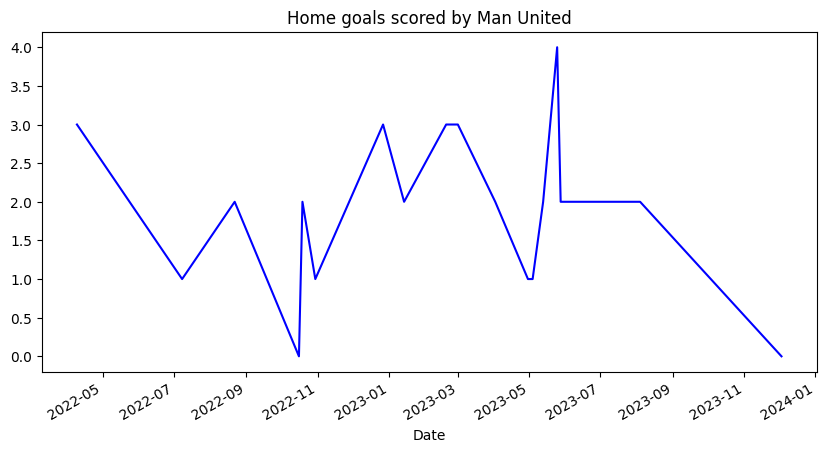

In [19]:
epl.query('HomeTeam=="Man United"').plot(kind='line', y='FTHG', figsize=(10, 5), style='-b', title="Home goals scored by Man United", legend=False)

Before I jump into any conclusions on the goals scored by Man United at home, I notice the date is way out of bound.<br>
The Premier League 2022/23 season started from August 2022 and ended in May 2023 but for this plot I'm seeing May 2022 and January 2024, which is way out of bound.<br>
This means there was some inconsistencies when recording the Date so I then decide to no longer use the Date column and drop it.<br>
I was planning on using the date as the index for selecting and filtering specific months and see how a club performed on a particular month, but since the Date has been wrongfully input, I don't need it

In [20]:
epl.reset_index(inplace=True)

In [21]:
epl.head()

Date        HomeTeam     AwayTeam  FTHG  FTAG
0 2022-05-08  Crystal Palace      Arsenal     0     2
1 2022-06-08          Fulham    Liverpool     2     2
2 2022-06-08     Bournemouth  Aston Villa     2     0
3 2022-06-08           Leeds       Wolves     2     1
4 2022-06-08       Newcastle   Nottingham     2     0

In [22]:
epl = epl[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]

In [23]:
epl.head()

HomeTeam     AwayTeam  FTHG  FTAG
0  Crystal Palace      Arsenal     0     2
1          Fulham    Liverpool     2     2
2     Bournemouth  Aston Villa     2     0
3           Leeds       Wolves     2     1
4       Newcastle   Nottingham     2     0

Text(0.5, 0, 'goals')

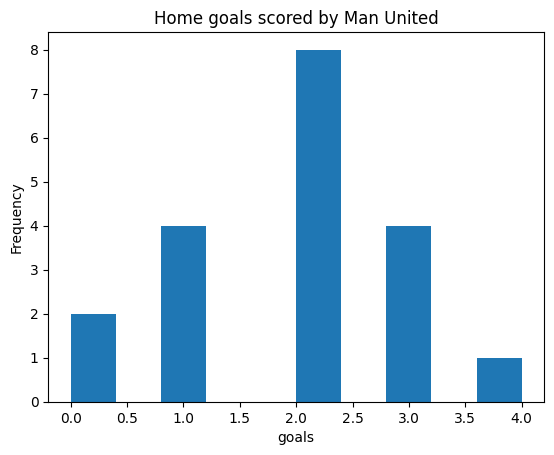

In [24]:
epl.query('HomeTeam=="Man United"').FTHG.plot(kind='hist', title="Home goals scored by Man United")
plt.xlabel('goals')

With the histogram we can easily pick out that Man United didn't score a single goal at home 2 times and they scored 2 goals the most, doing this 8 times.

In [25]:
epl.pivot(columns='HomeTeam', values='FTHG')[teams].Arsenal.value_counts()

3.0    7
4.0    4
2.0    2
5.0    2
0.0    2
1.0    2
Name: Arsenal, dtype: int64

I pivot the dataframe and put it into a wide format according to the Home Team and using the Home Goals.<br>
I only select the big 6 clubs after pivoting.<br>
I then select Arsenal and use the value_counts() method. <br>
From the results we see that Arsenal scored 3 goals at home 7 times.<br>
They didn't score a single goal at home only 2 times which makes their home form according to goals scored impressive.

The pivoting of the dataframe i.e putting it into a wide format was done in order for easy querying of data
according to the team.<br>

We then plot the home form of the big 6 clubs according to goals scored.

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

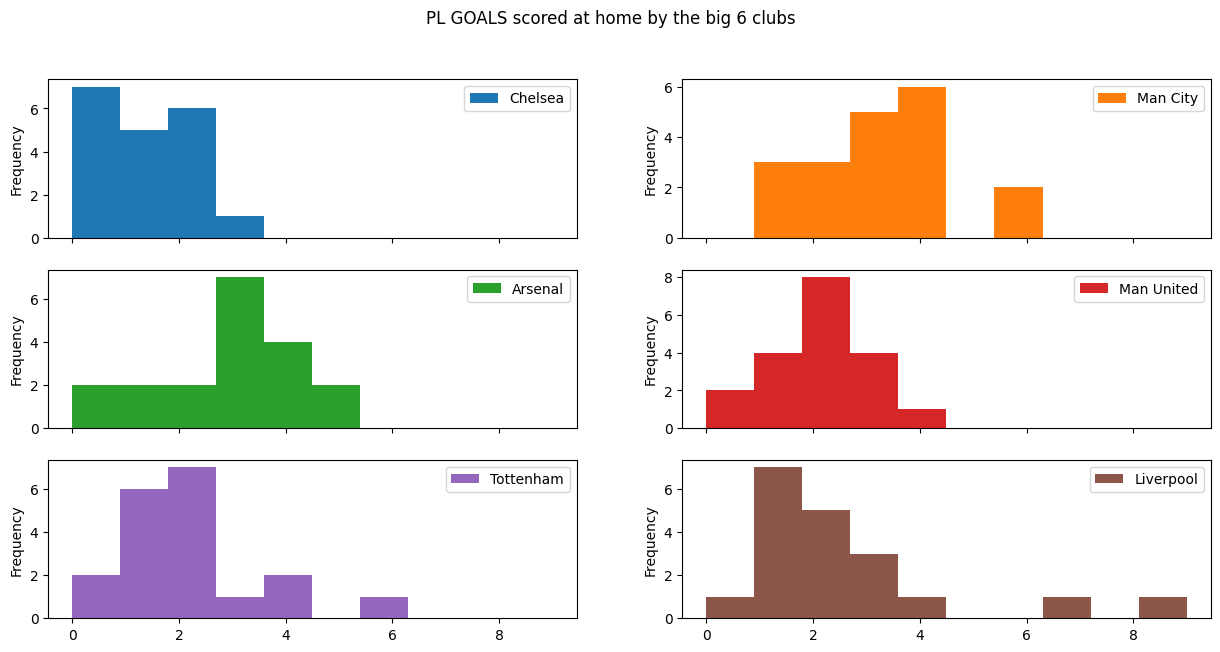

In [26]:
epl.pivot(columns='HomeTeam', values='FTHG')[teams].plot(kind='hist', subplots=True, layout=(3,2), figsize=(15,7), title='PL GOALS scored at home by the big 6 clubs')

From the visualizations it is clear to see that Chelsea was struggling as it had 7 games where it didn't score any goal at home.<br>
Man City's home form was impressive, there was no game when they did not score at home.<br>
Liverpool had 2 games when they performed exceptionally well by scoring 7 and 9.<br>
Tottenham had 1 game when they scored 6 goals, as for the rest of their games most of them they scored only 1 and 2 goals.<br>
Man United had 8 games when they scored 2 goals.<br>
Arsenal had 7 games when they scored 3 goals at home making them and Man City the most in form teams at home in terms of goals scored.<br>
Chelsea was the least in form team at home judging by the goals scored metric.<br>

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

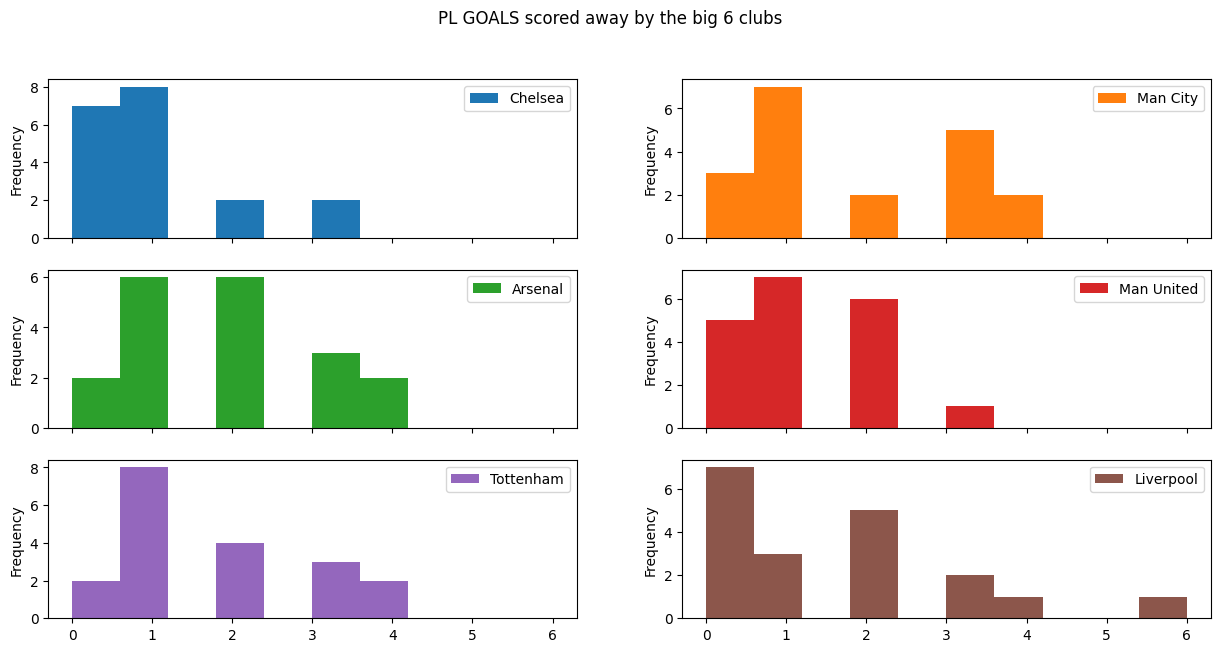

In [27]:
epl.pivot(columns='AwayTeam', values='FTAG')[teams].plot(kind='hist', subplots=True, layout=(3,2), figsize=(15,7), title='PL GOALS scored away by the big 6 clubs')

Liverpool and Chelsea did not perform quite well away with the teams not scoring any goals 7 times.<br>
Tottenham's away form was impressive as it didn't score a single goal away on only two occasions, for the rest of the games they made sure that they scored at least one goal.

In [28]:
epl.pivot(columns='AwayTeam', values='FTAG')[teams]

AwayTeam  Chelsea  Man City  Arsenal  Man United  Tottenham  Liverpool
0             NaN       NaN      2.0         NaN        NaN        NaN
1             NaN       NaN      NaN         NaN        NaN        2.0
2             NaN       NaN      NaN         NaN        NaN        NaN
3             NaN       NaN      NaN         NaN        NaN        NaN
4             NaN       NaN      NaN         NaN        NaN        NaN
..            ...       ...      ...         ...        ...        ...
375           NaN       NaN      NaN         NaN        NaN        NaN
376           NaN       NaN      NaN         NaN        4.0        NaN
377           NaN       NaN      NaN         NaN        NaN        NaN
378           NaN       NaN      NaN         NaN        NaN        NaN
379           NaN       NaN      NaN         NaN        NaN        4.0

[380 rows x 6 columns]

In [29]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='FTHG', ylabel='FTHG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTHG'>],
       [<AxesSubplot:xlabel='FTHG', ylabel='FTAG'>,
        <AxesSubplot:xlabel='FTAG', ylabel='FTAG'>]], dtype=object)

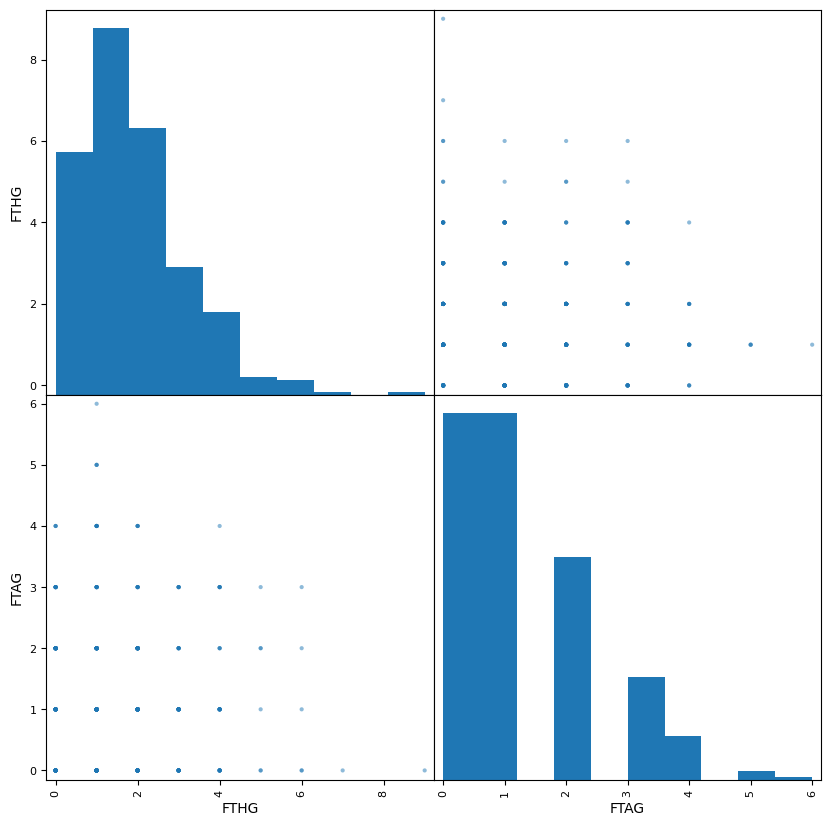

In [30]:
scatter_matrix(epl, figsize=(10, 10))

I try to find some correlations on the dataset but there are no variables which are correlated.<br>

Text(0.5, 1.0, 'Big 6 Box Plots by goals scored at home')

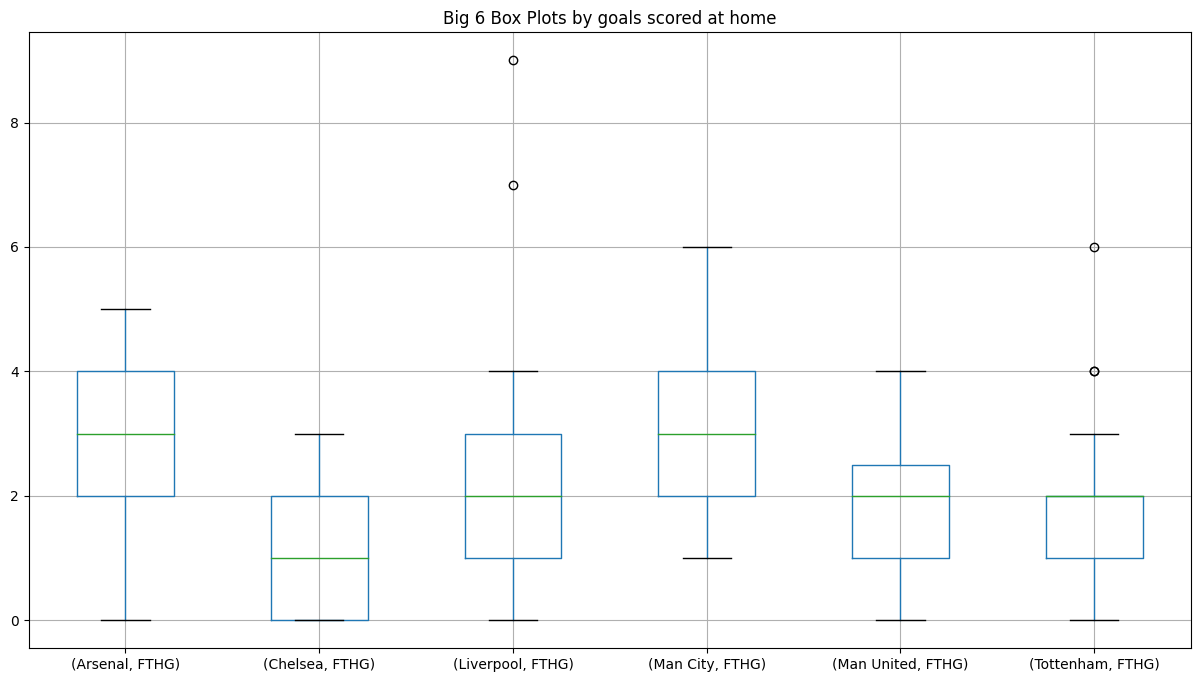

In [31]:
epl[['HomeTeam', 'FTHG']].query(f'HomeTeam=={teams}').groupby('HomeTeam').boxplot(figsize=(15, 8), subplots=False)
plt.title('Big 6 Box Plots by goals scored at home')

The maximum goals scored by Arsenal at home is 5 goals.<br>
25% of Arsenal's and Man City's goals lie at or below 2 goals which is very impressive especially when comparing with Chelsea's and Tottenham's goals as 75% of their goals are the ones that lie at or below 2 goals.<br>
Man City's goal distribution is positively skewed.<br>
The 7 and 9 goals of Liverpool are deemed as outliers.<br>
Man United has a positively skewed goal distribution with 75% of their goals lying at or below 2.5

Text(0.5, 1.0, 'Big 6 Box Plots by goals scored at away')

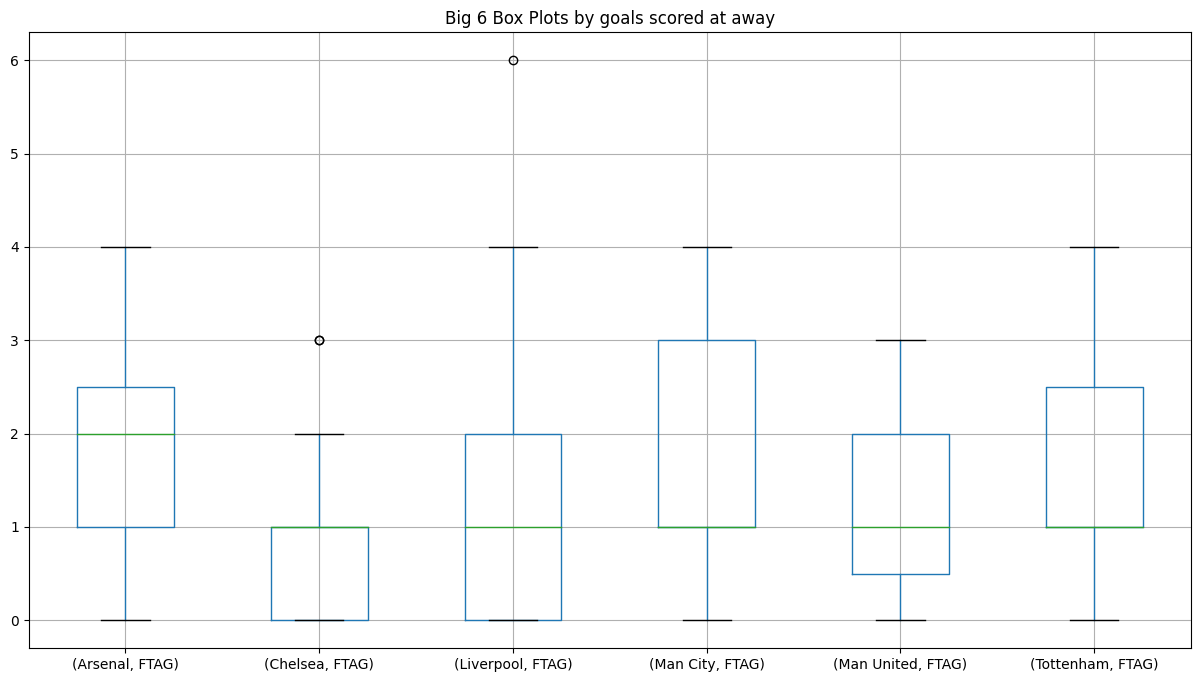

In [32]:
epl[['AwayTeam', 'FTAG']].query(f'AwayTeam=={teams}').groupby('AwayTeam').boxplot(figsize=(15, 8), subplots=False)
plt.title('Big 6 Box Plots by goals scored at away')

We can note that Chelsea's away form was poor.  75% of their goals were just 1 goal and scoring 3 goals away is deemed as an outlier.<br>
Half of all the big 6 team's goals except Arsenal was 1 goal and for Arsenal  half of their goals were 2 and below.<br>
This makes Arsenal's form away more impressive amongst the big 6 clubs.


## **If you've read this until the end a big shout out to you.
15 July 2023 09:48 a.m<br>
The Good Writer/Che